In [1]:
from rdkit import Chem
from rdkit.Chem import rdqueries
# default RDKit behavior is to reject hypervalent P, so you need to set sanitize=False
m = Chem.MolFromSmiles('F[P-](F)(F)(F)(F)F.CN(C)C(F)=[N+](C)C',sanitize=False)

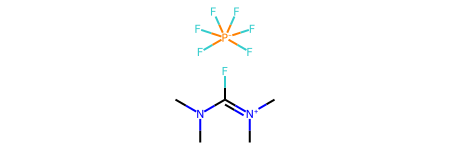

In [2]:
m

In [3]:
q = rdqueries.AtomNumEqualsQueryAtom(15)
phosphorus = m.GetAtomsMatchingQuery(q)[0]
phosphorus.GetHybridization()

rdkit.Chem.rdchem.HybridizationType.UNSPECIFIED

In [4]:
m_sml_original = Chem.MolToSmiles(m)

In [5]:
# next, you probably want to at least do a partial sanitization so that the molecule is actually useful:
m.UpdatePropertyCache(strict=False)

In [6]:
Chem.SanitizeMol(
    m,
    # Chem.SanitizeFlags.SANITIZE_FINDRADICALS
    # |Chem.SanitizeFlags.SANITIZE_KEKULIZE
    # |Chem.SanitizeFlags.SANITIZE_SETAROMATICITY
    # |Chem.SanitizeFlags.SANITIZE_SETCONJUGATION
    # |
    Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION
    # Chem.SanitizeFlags.SANITIZE_SYMMRINGS
    ,
    catchErrors=True,
    )

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

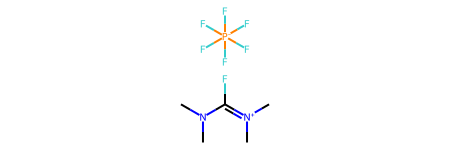

In [7]:
m

In [8]:
phosphorus.GetHybridization()

rdkit.Chem.rdchem.HybridizationType.SP3D2

In [9]:
m_partially_sanitized_sml = Chem.MolToSmiles(m)


In [10]:
m_partially_sanitized_sml == m_sml_original

True